In [3]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

# Encoding packages
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

Data collection

In [4]:
df1 = pd.read_csv('D:/Data science projects/Singapore flat resale price prediction/data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df1.head(3)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0


In [5]:
df2 = pd.read_csv('D:/Data science projects/Singapore flat resale price prediction/data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df2.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [6]:
df3 = pd.read_csv('D:/Data science projects/Singapore flat resale price prediction/data/Resale flat prices based on registration date from Jan-2017 onwards.csv')
df3.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


Data preprocessing


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191448 entries, 0 to 191447
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                191448 non-null  object 
 1   town                 191448 non-null  object 
 2   flat_type            191448 non-null  object 
 3   block                191448 non-null  object 
 4   street_name          191448 non-null  object 
 5   storey_range         191448 non-null  object 
 6   floor_area_sqm       191448 non-null  float64
 7   flat_model           191448 non-null  object 
 8   lease_commence_date  191448 non-null  int64  
 9   remaining_lease      191448 non-null  object 
 10  resale_price         191448 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.1+ MB


In [10]:
df3["remaining_lease"] = df3["remaining_lease"].str.split(' ').str[0].astype(int)


In [11]:
df3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0


In [12]:
df = pd.concat([df1,df2,df3], ignore_index=True)
df.tail(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
280801,2024-10,YISHUN,5 ROOM,504C,YISHUN ST 51,10 TO 12,113.0,Improved,2016,747000.0,90.0
280802,2024-10,YISHUN,5 ROOM,870,YISHUN ST 81,04 TO 06,122.0,Improved,1987,690000.0,62.0
280803,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,10 TO 12,164.0,Apartment,1992,1000000.0,66.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280804 entries, 0 to 280803
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                280804 non-null  object 
 1   town                 280804 non-null  object 
 2   flat_type            280804 non-null  object 
 3   block                280804 non-null  object 
 4   street_name          280804 non-null  object 
 5   storey_range         280804 non-null  object 
 6   floor_area_sqm       280804 non-null  float64
 7   flat_model           280804 non-null  object 
 8   lease_commence_date  280804 non-null  int64  
 9   resale_price         280804 non-null  float64
 10  remaining_lease      228601 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 23.6+ MB


In [14]:
df.isnull().sum()

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease        52203
dtype: int64

In [15]:
# Creating a new column "address"
df["address"]= df["block"]+" "+df["street_name"]



In [16]:
#droping the "street_name" and "block"
df= df.drop(columns=["block","street_name"])


In [17]:
# coverting the month datatype
df["month"] = pd.to_datetime(df["month"], format="%Y-%m")


In [18]:
#spliting the month column to "Year", "month"
df["year"]= df["month"].dt.year
df["month"]= df["month"].dt.month


In [19]:
df.head(3)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address,year
0,3,ANG MO KIO,2 ROOM,06 TO 10,45.0,Improved,1986,250000.0,NaN,172 ANG MO KIO AVE 4,2012
1,3,ANG MO KIO,2 ROOM,01 TO 05,44.0,Improved,1980,265000.0,NaN,510 ANG MO KIO AVE 8,2012
2,3,ANG MO KIO,3 ROOM,06 TO 10,68.0,New Generation,1980,315000.0,NaN,610 ANG MO KIO AVE 4,2012


In [20]:
# filling the NaN values in remaining_lease column
df["remaining_lease"].fillna(99-(df["year"]-df["lease_commence_date"]), inplace = True)


In [21]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
address                0
year                   0
dtype: int64

In [22]:
df.head(3)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address,year
0,3,ANG MO KIO,2 ROOM,06 TO 10,45.0,Improved,1986,250000.0,73.0,172 ANG MO KIO AVE 4,2012
1,3,ANG MO KIO,2 ROOM,01 TO 05,44.0,Improved,1980,265000.0,67.0,510 ANG MO KIO AVE 8,2012
2,3,ANG MO KIO,3 ROOM,06 TO 10,68.0,New Generation,1980,315000.0,67.0,610 ANG MO KIO AVE 4,2012


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280804 entries, 0 to 280803
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                280804 non-null  int32  
 1   town                 280804 non-null  object 
 2   flat_type            280804 non-null  object 
 3   storey_range         280804 non-null  object 
 4   floor_area_sqm       280804 non-null  float64
 5   flat_model           280804 non-null  object 
 6   lease_commence_date  280804 non-null  int64  
 7   resale_price         280804 non-null  float64
 8   remaining_lease      280804 non-null  float64
 9   address              280804 non-null  object 
 10  year                 280804 non-null  int32  
dtypes: float64(3), int32(2), int64(1), object(5)
memory usage: 21.4+ MB


In [24]:
df['remaining_lease'] = df['remaining_lease'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280804 entries, 0 to 280803
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                280804 non-null  int32  
 1   town                 280804 non-null  object 
 2   flat_type            280804 non-null  object 
 3   storey_range         280804 non-null  object 
 4   floor_area_sqm       280804 non-null  float64
 5   flat_model           280804 non-null  object 
 6   lease_commence_date  280804 non-null  int64  
 7   resale_price         280804 non-null  float64
 8   remaining_lease      280804 non-null  int64  
 9   address              280804 non-null  object 
 10  year                 280804 non-null  int32  
dtypes: float64(2), int32(2), int64(2), object(5)
memory usage: 21.4+ MB


In [26]:
print(df["town"].unique())
print(df["flat_type"].unique())
print(df["flat_model"].unique())


['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' 'MULTI-GENERATION'
 '1 ROOM']
['Improved' 'New Generation' 'Standard' 'Model A' 'Simplified'
 'Premium Apartment' 'Maisonette' 'Model A-Maisonette' 'Apartment'
 'Adjoined flat' 'Multi Generation' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'DBSS' 'Type S1' 'Type S2'
 'Premium Apartment Loft' '2-room' '3Gen']


In [27]:
print(df["town"].nunique())
print(df["flat_type"].nunique())
print(df["flat_model"].nunique())


26
7
21


In [28]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df["town"]= LabelEncoder().fit_transform(df["town"])
df["flat_model"]= LabelEncoder().fit_transform(df[["flat_model"]])
df["flat_type"]= LabelEncoder().fit_transform(df[["flat_type"]])
df["address"]= LabelEncoder().fit_transform(df["address"])



In [29]:
df[["storey_start", "storey_end"]]= df["storey_range"].str.split(" TO ",expand=True)



In [30]:
#droping the "storey_range" column
df.drop(columns=["storey_range"],inplace= True)


In [31]:
df.head(3)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address,year,storey_start,storey_end
0,3,0,1,45.0,5,1986,250000.0,73,1625,2012,06,10
1,3,0,1,44.0,5,1980,265000.0,67,6263,2012,01,05
2,3,0,2,68.0,12,1980,315000.0,67,7161,2012,06,10


In [32]:
df["storey_start"]= df["storey_start"].astype(int)
df["storey_end"]= df["storey_end"].astype(int)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280804 entries, 0 to 280803
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                280804 non-null  int32  
 1   town                 280804 non-null  int64  
 2   flat_type            280804 non-null  int64  
 3   floor_area_sqm       280804 non-null  float64
 4   flat_model           280804 non-null  int64  
 5   lease_commence_date  280804 non-null  int64  
 6   resale_price         280804 non-null  float64
 7   remaining_lease      280804 non-null  int64  
 8   address              280804 non-null  int64  
 9   year                 280804 non-null  int32  
 10  storey_start         280804 non-null  int64  
 11  storey_end           280804 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 23.6 MB


In [34]:
# Rearrange the columns
df.rename(columns={'remaining_lease':'remaining_lease_year'},inplace=True)

df = df[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year',
       'lease_commence_date', 'resale_price']]
df.head(3)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,lease_commence_date,resale_price
0,2012,3,0,1,45.0,5,1625,6,10,73,1986,250000.0
1,2012,3,0,1,44.0,5,6263,1,5,67,1980,265000.0
2,2012,3,0,2,68.0,12,7161,6,10,67,1980,315000.0


In [35]:
df.to_csv("ResaleFlatPrices.csv", index= False)


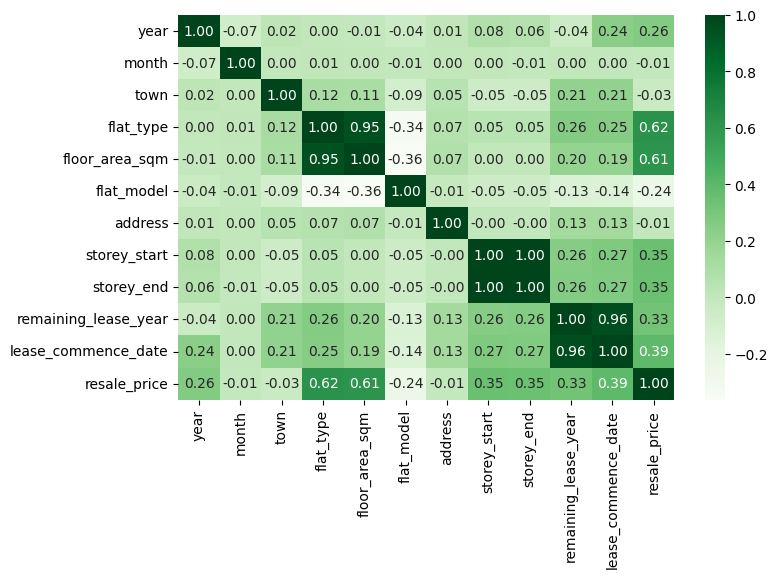

In [36]:
# Checking the correlation using heatmap
df_corr= df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(df_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [37]:
# Drop month and address columns since have lowest correlation with other columns

df= df.drop(columns=["month","address"])


In [38]:
# checking duplicate values

df.duplicated().sum()
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)


In [53]:
# detecting the skewed columns using plot
def plots(df,column):
  #histogram plot
  plt.figure(figsize=(10,4))

  plt.subplot(1,2,1)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,2,2)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

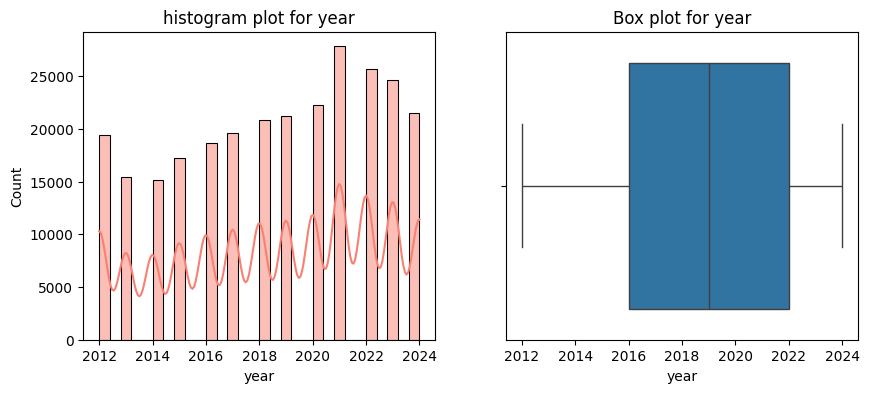

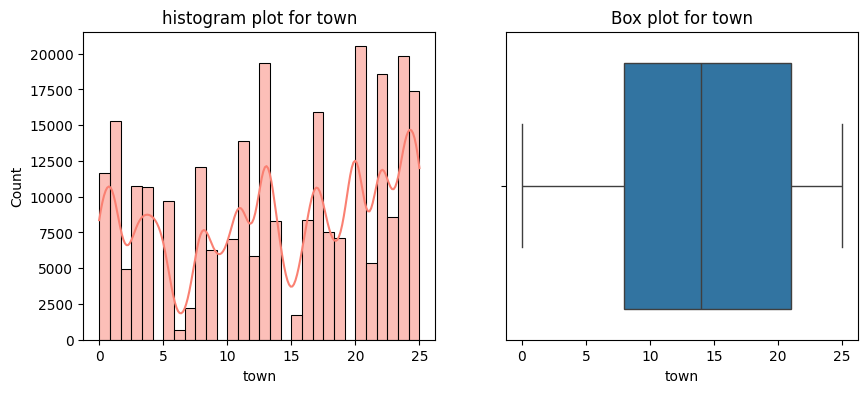

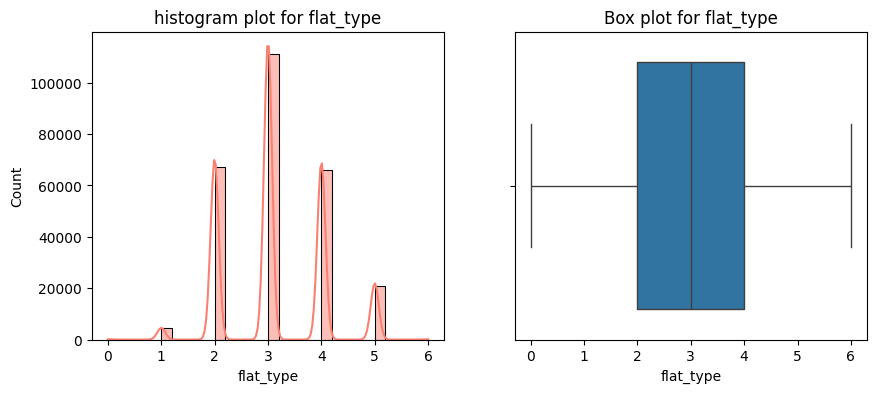

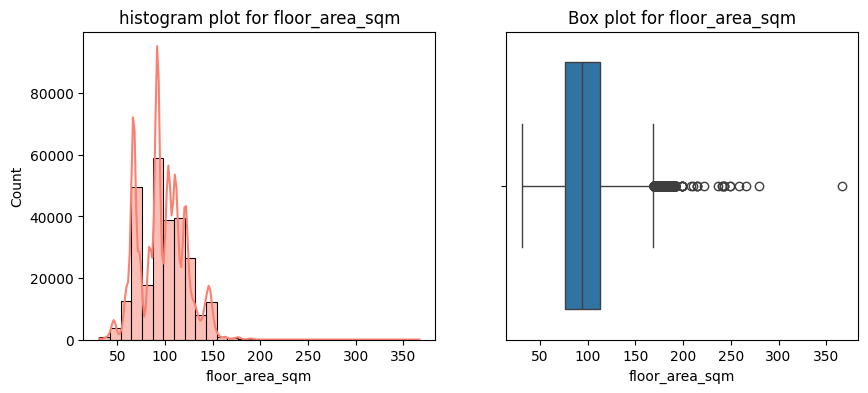

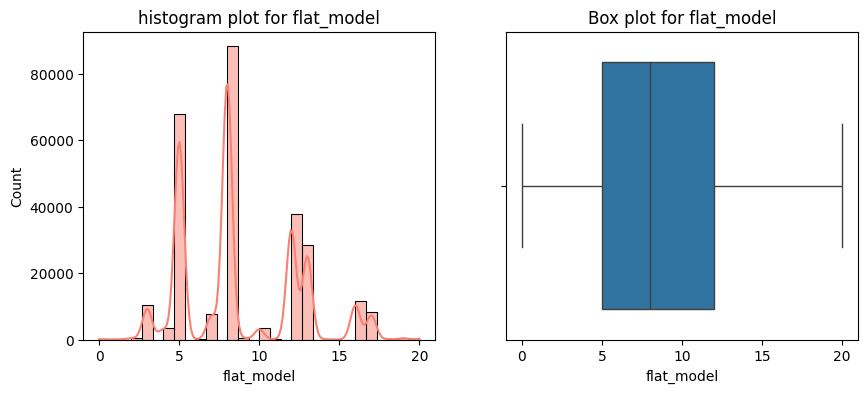

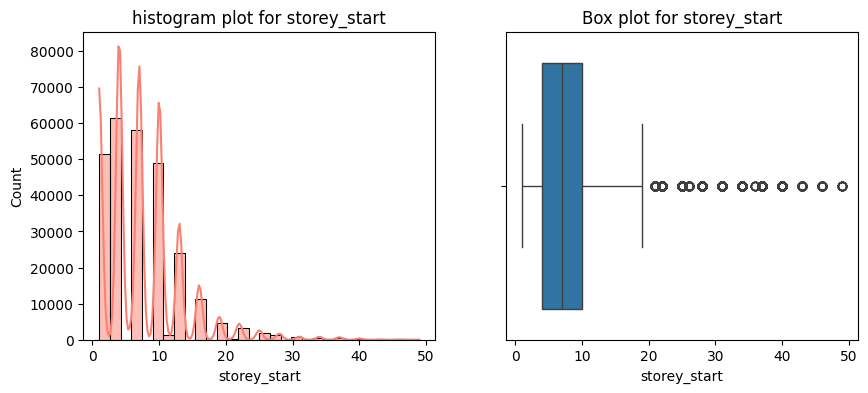

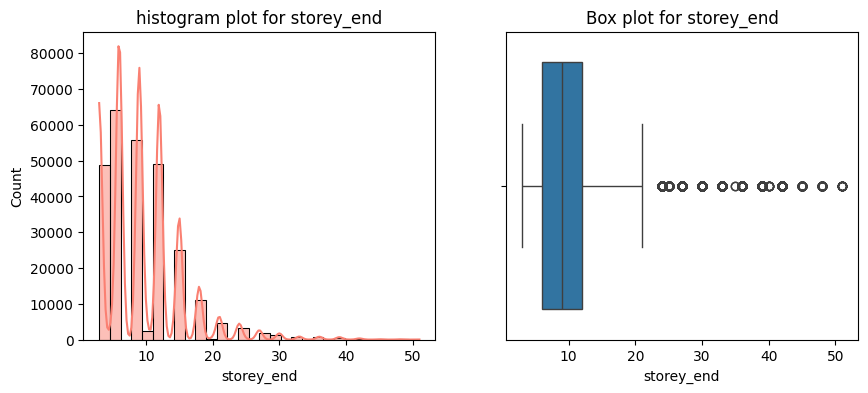

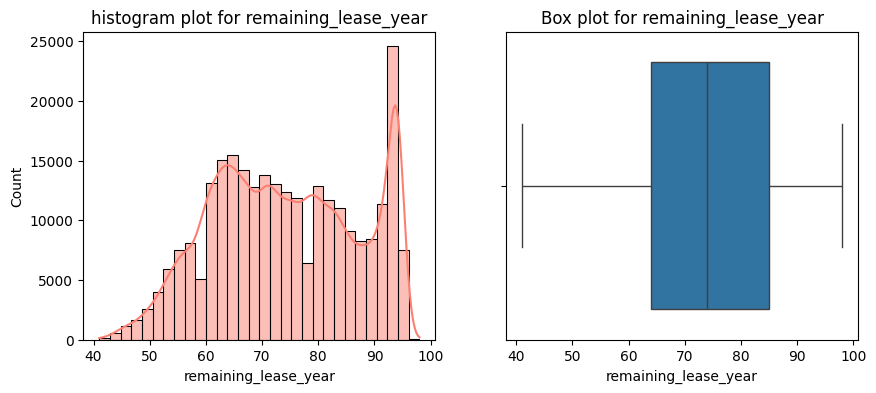

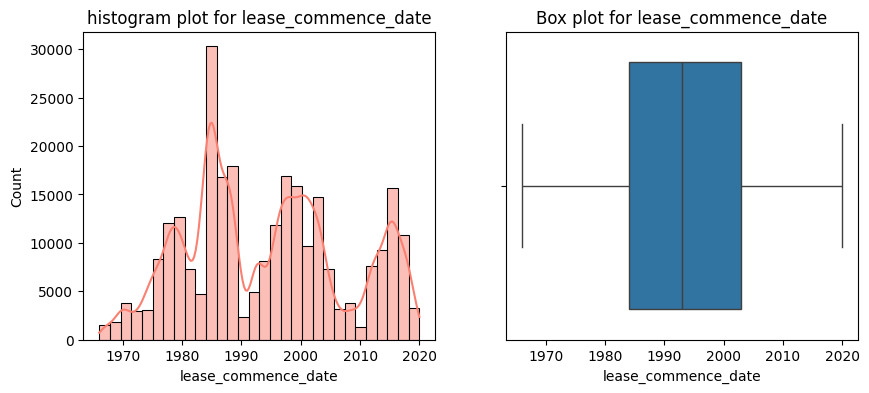

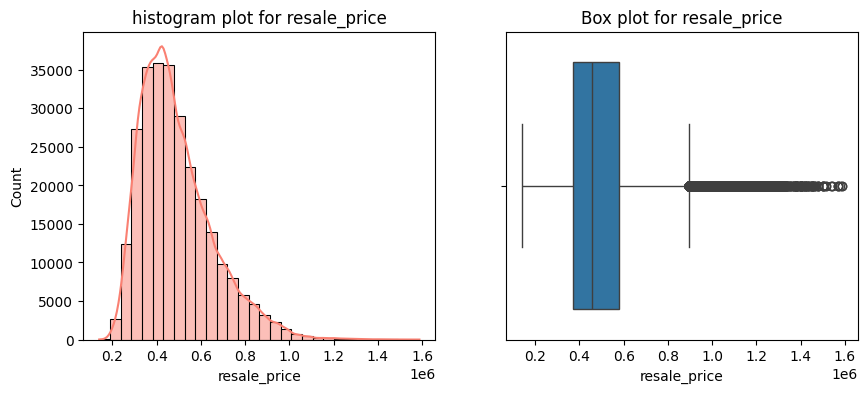

In [52]:
for column in df.columns:
    plots(df,column)


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,269660.0,2018.522591,3.688322,2012.0,2016.0,2019.0,2022.0,2024.0
town,269660.0,13.805433,7.986776,0.0,8.0,14.0,21.0,25.0
flat_type,269660.0,3.118004,0.928236,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,269660.0,97.180986,24.361237,31.0,76.0,94.0,113.0,366.7
flat_model,269660.0,8.731161,3.692509,0.0,5.0,8.0,12.0,20.0
storey_start,269660.0,7.478061,5.743379,1.0,4.0,7.0,10.0,49.0
storey_end,269660.0,9.527657,5.736450,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,269660.0,74.197245,12.938464,41.0,64.0,74.0,85.0,98.0
lease_commence_date,269660.0,1994.076823,13.254223,1966.0,1984.0,1993.0,2003.0,2020.0
resale_price,269660.0,489245.724395,165278.834887,140000.0,369000.0,455888.0,578888.0,1588000.0


Handling Skewness

In [55]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

df["storey_start"]= np.log(df["storey_start"])
df["storey_end"]= np.log(df["storey_end"])
df["resale_price"]= np.log(df["resale_price"])
skewed_columns=["storey_start","storey_end","resale_price"]


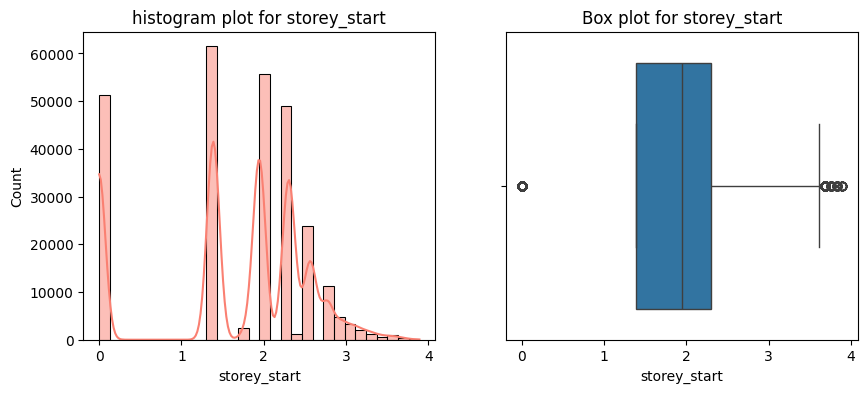

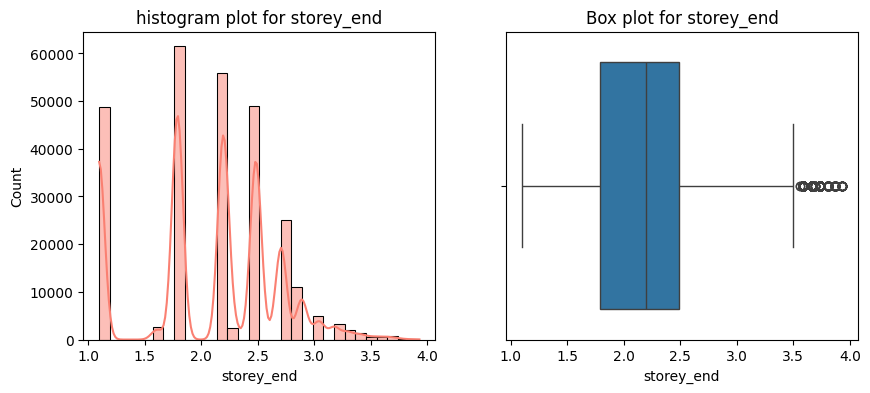

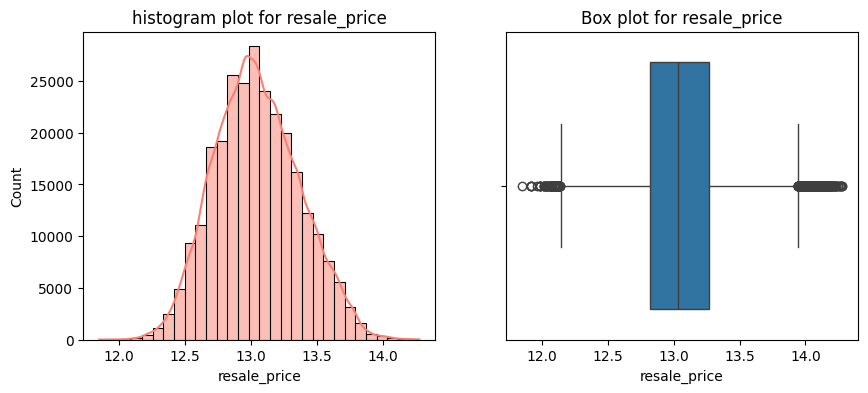

In [56]:
for column in skewed_columns:
    plots(df,column)


Handling outlier using IQR(Interquartile Range) method

In [57]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [58]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for column in outlier_columns:
    outlier(df,column)

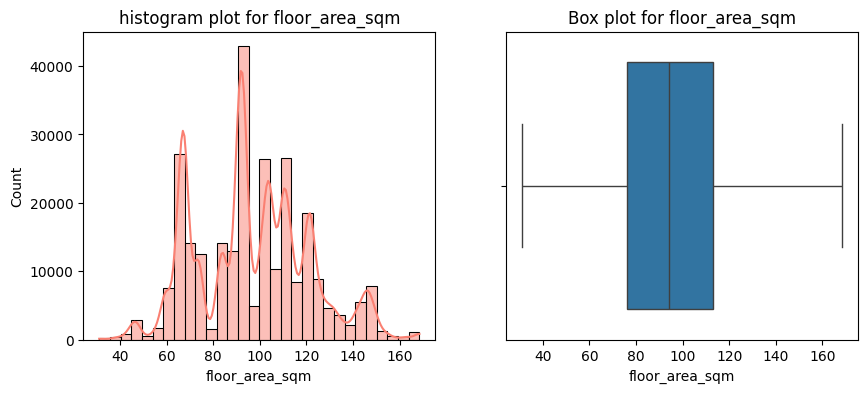

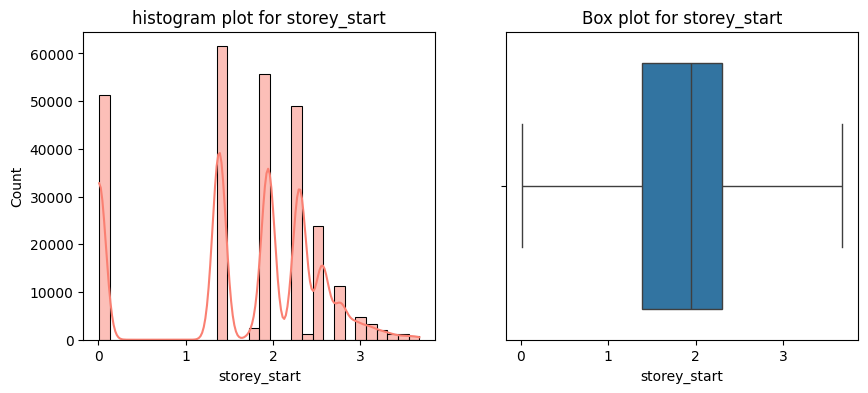

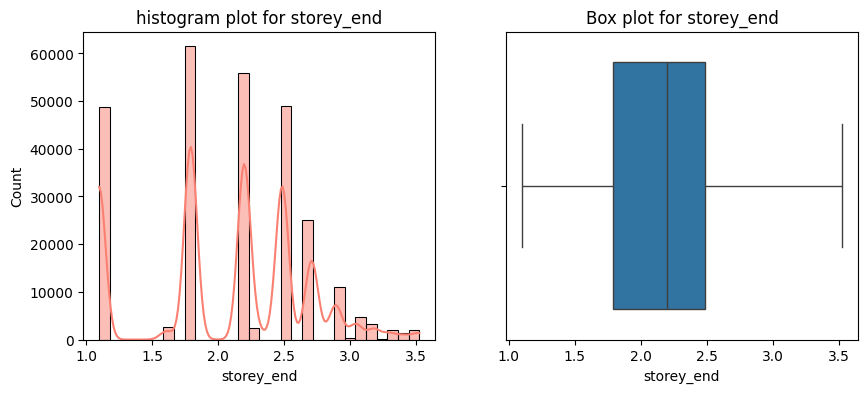

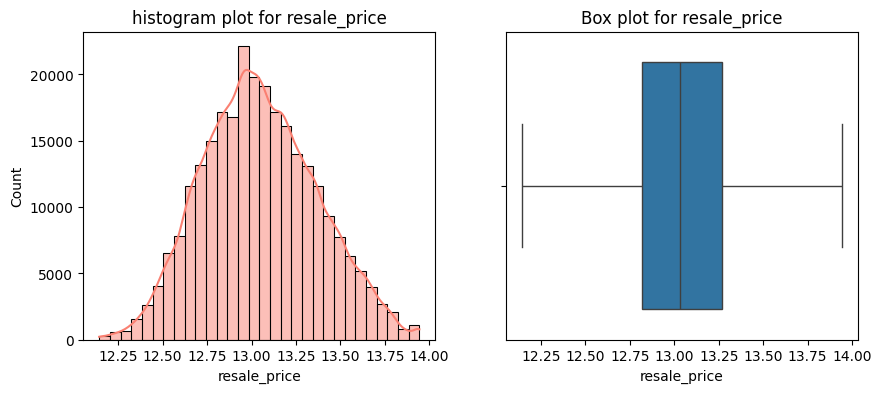

In [59]:
# plot after removing outliers

for column in outlier_columns:
    plots(df,column)


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,269660.0,2018.522591,3.688322,2012.000000,2016.000000,2019.000000,2022.000000,2024.000000
town,269660.0,13.805433,7.986776,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,269660.0,3.118004,0.928236,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,269660.0,97.142758,24.228821,31.000000,76.000000,94.000000,113.000000,168.500000
flat_model,269660.0,8.731161,3.692509,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,269660.0,1.664667,0.930274,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,269660.0,2.081242,0.598789,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,269660.0,74.197245,12.938464,41.000000,64.000000,74.000000,85.000000,98.000000
lease_commence_date,269660.0,1994.076823,13.254223,1966.000000,1984.000000,1993.000000,2003.000000,2020.000000
resale_price,269660.0,13.047536,0.321802,12.143083,12.818552,13.030002,13.268864,13.944333


Regression Model selection

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle

In [72]:
# Train Test Split for model selection
def model_selection(df,algorithm):
    # x, y spliting
    X= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_rmse= root_mean_squared_error(y_train, y_pred_train)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_rmse= root_mean_squared_error(y_test, y_pred_test)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }
    
    print("******* Training Data ******* ")
    for key, value in metrics_train.items():
        print(f'{key}: {value}')
    print("******* Test Data ******* ")
    for key, value in metrics_test.items():
        print(f'{key}: {value}')
    



In [73]:
model_selection(df,LinearRegression)
model_selection(df,DecisionTreeRegressor)
model_selection(df,RandomForestRegressor)
model_selection(df,AdaBoostRegressor)
model_selection(df,ExtraTreesRegressor)
model_selection(df,GradientBoostingRegressor)


******* Training Data ******* 
Name: LinearRegression
R2_score: 0.6297802904007685
Root_mean_squared_error: 0.19576872465982414
Mean_absolute_error: 0.15511997211853204
******* Test Data ******* 
Name: LinearRegression
R2_score: 0.6325962165047707
Root_mean_squared_error: 0.19519004429053025
Mean_absolute_error: 0.1552385595812997
******* Training Data ******* 
Name: DecisionTreeRegressor
R2_score: 0.9889793119095396
Root_mean_squared_error: 0.033776753097574205
Mean_absolute_error: 0.018696679064744832
******* Test Data ******* 
Name: DecisionTreeRegressor
R2_score: 0.9356054029231161
Root_mean_squared_error: 0.08171665211261192
Mean_absolute_error: 0.05850881279261392
******* Training Data ******* 
Name: RandomForestRegressor
R2_score: 0.9856295190828884
Root_mean_squared_error: 0.03856996056748116
Mean_absolute_error: 0.027591929751174207
******* Test Data ******* 
Name: RandomForestRegressor
R2_score: 0.9561543299628618
Root_mean_squared_error: 0.06742938615223307
Mean_absolute_err

In [74]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#X,y spliting
X= df.drop(columns=["resale_price"])
y= df["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

model = RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)

test_rmse= root_mean_squared_error(y_test, y_pred)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print("******* Test Data ******* ")
for key, value in metrics_test.items():
        print(f'{key}: {value}')

******* Test Data ******* 
Name: RandomForestRegressor
R2_score: 0.9560680296694177
Root_mean_squared_error: 0.06749571328542725
Mean_absolute_error: 0.05000246238988411


In [75]:
df.iloc[10456]

year                    2012.000000
town                      23.000000
flat_type                  2.000000
floor_area_sqm            65.000000
flat_model                 5.000000
storey_start               2.302585
storey_end                 2.484907
remaining_lease_year      60.000000
lease_commence_date     1973.000000
resale_price              12.834681
Name: 10456, dtype: float64

In [76]:
# check our model prediction price wiht this data
user_data = np.array([[2012,23,2,65,5,2,2,60,1973]])
price_predict = model.predict(user_data)
price_predict[0]

np.float64(12.789471485349246)

In [77]:
# Saving the model using pickle
with open("Singapore_Flat_Resale_Price_Model.pkl","wb") as f:
  pickle.dump(model,f)


In [78]:
import pickle
import numpy as np



In [79]:
with open("Singapore_Flat_Resale_Price_Model.pkl","rb") as f1:
  regression_model = pickle.load(f1)


In [83]:
price_predict1 = regression_model.predict(user_data)
np.exp(price_predict1[0])

np.float64(358423.843448541)